In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rc('font', family='serif')
from importlib import reload
from src.dr.pca import Pca
from src.strats.starb_fm import StArbFm
from src.backtest import backtest

In [2]:
idx = pd.bdate_range(start='01-01-2000', end='01-01-2019')
p = 100
rand = pd.DataFrame(np.random.normal(size=(len(idx), p)), 
                    index=idx, columns=['col_' + str(i) for i in range(p)])
rand

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99
2000-01-03,2.014869,-1.557260,0.374302,-0.658460,-0.568307,-0.607902,-1.208159,-1.948926,0.630410,0.242917,...,-0.595365,-0.680815,-1.806307,-0.507729,1.019300,1.626294,0.220779,-0.499503,0.039466,-0.281712
2000-01-04,-0.136383,0.320391,0.583733,0.637291,0.157256,1.068631,-0.103998,-0.281082,-0.100994,0.012658,...,-0.339416,-0.414891,-0.207584,1.673716,0.501513,0.693180,-0.283699,0.043298,-0.589214,-0.557710
2000-01-05,0.711534,-1.617048,1.873473,0.474390,-1.499658,-0.033315,-0.615052,-0.290398,0.788228,1.633171,...,-0.570971,-0.165580,0.301533,0.599138,-0.868696,-1.526259,-0.240179,0.525703,-0.867732,2.045660
2000-01-06,0.484001,-0.388953,-1.299248,-0.158843,0.285081,0.315081,1.586843,0.675859,0.985548,-1.395934,...,0.477122,-0.489459,-1.592553,-0.804239,-0.696601,-0.785583,-0.766013,0.298327,1.262039,1.012453
2000-01-07,0.841364,0.259681,-1.329006,0.651672,-2.850051,0.501891,0.414553,0.298987,0.337155,-0.477235,...,2.074089,-0.752904,0.045064,-0.273956,-0.350709,0.449391,1.099182,0.607990,2.226900,-0.910491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,-1.297854,1.014614,-1.292019,0.921591,1.149202,0.376536,-0.809026,-0.892148,0.231897,-0.020882,...,-0.208592,0.366176,0.142485,2.208168,-0.351249,1.174755,-0.067899,-0.237704,0.668156,0.119603
2018-12-27,-0.128678,-0.792339,0.053270,-0.899838,-0.311762,-0.346426,-1.017834,1.503771,1.444725,-0.437145,...,-0.597338,0.089806,1.063454,1.403776,0.272121,-0.583604,0.411143,-0.351642,0.006264,0.639619
2018-12-28,-1.111709,0.537760,0.576978,-1.352798,0.462520,-2.419283,-0.344005,-0.882765,-2.556017,-1.231227,...,-0.202257,-1.652797,-1.481731,0.330531,0.722014,0.130361,-0.330047,0.720197,-0.219710,-0.350530
2018-12-31,1.310487,-0.240767,-0.434328,-0.468478,-0.424822,0.638913,-1.685927,-0.128183,0.433067,-0.779349,...,-0.830963,-0.940329,0.206814,-0.935574,-0.585120,-0.419051,-0.248994,-0.234334,1.458224,1.222394


In [3]:
strats = [StArbFm(Pca(pr=75, corr=True), cal_freq=5, span=5, window_len=252),]
for i in range(5):
    rand = pd.DataFrame(np.random.normal(size=(len(idx), p)), 
                    index=idx, columns=['col_' + str(i) for i in range(p)])
    backtest(rand, strats, it=2000, savefig=False)

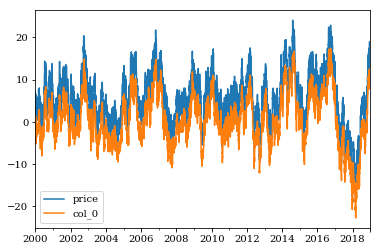

In [3]:
n = len(idx)
p = 100
residuals = sm.tsa.arma_generate_sample(ar=[1, -.99], ma=[1], nsample=(n, p))
residuals = pd.DataFrame(residuals, index=idx, columns=['col_' + str(i) for i in range(p)])

# Gaussian common factor + mean reverting residuals.
ma_prices = np.array([np.random.normal(5,1) * np.ones(p) for i in range(n)]) + residuals
ma_prices = pd.DataFrame(ma_prices, index=idx, columns=['col_' + str(i) for i in range(p)])
ma_prices['col_0'].plot(label='price')
residuals['col_0'].plot()
plt.legend()

Registered Corr_pca_252
Iteration: 500
Iteration: 1000
Iteration: 1500
Iteration: 2000
Iteration: 2500
Iteration: 3000
Iteration: 3500
Iteration: 4000
Iteration: 4500
DatetimeIndex(['2000-12-25', '2001-01-01', '2001-01-08', '2001-01-15',
               '2001-01-22', '2001-01-29', '2001-02-05', '2001-02-12',
               '2001-02-19', '2001-02-26',
               ...
               '2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-17',
               '2018-12-24', '2018-12-31'],
              dtype='datetime64[ns]', length=941, freq='W-MON')
DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-31', '201

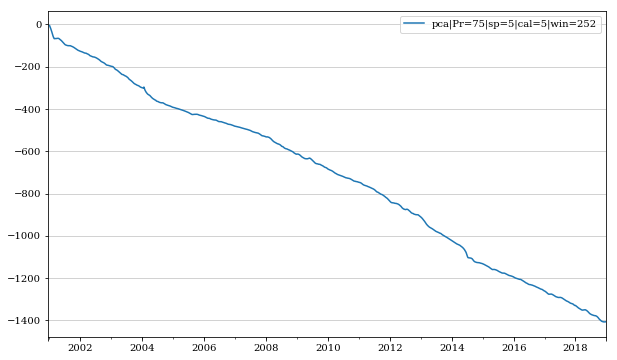

In [6]:
import src.strats.starb_fm
reload(src.strats.starb_fm)
from src.strats.starb_fm import StArbFm


strats = [StArbFm(Pca(pr=75, corr=True), cal_freq=5, span=5, window_len=252),]
backtest(ma_prices, strats)

In [7]:
print(strats[0].cal_dates & strats[0].trading_days)

DatetimeIndex(['2000-12-20', '2000-12-21', '2000-12-22', '2000-12-25',
               '2000-12-26', '2000-12-27', '2000-12-28', '2000-12-29',
               '2001-01-01', '2001-01-02',
               ...
               '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=4705, freq='B')


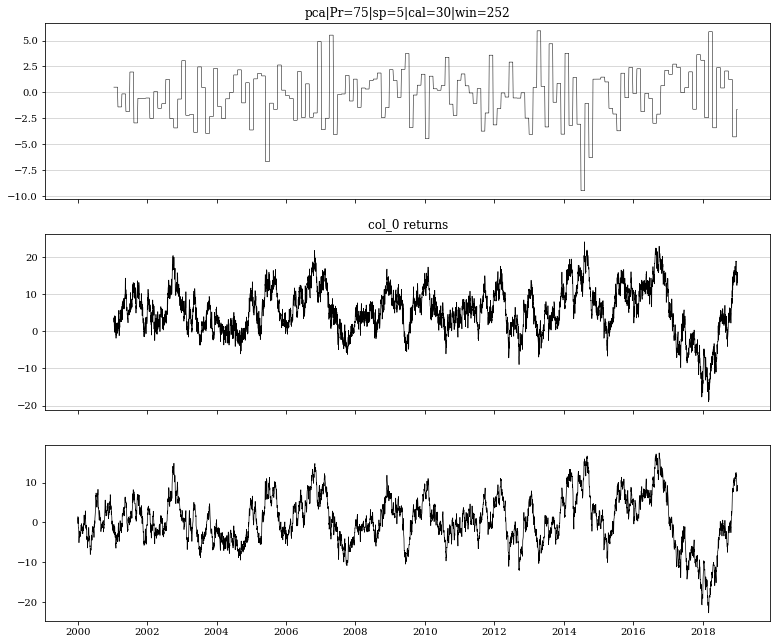

In [5]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(13, 11))
ax[0].plot(strats[0].portfolios['col_0'], label=strats[0].id, c='k', linewidth=.5)
ax[0].grid(axis='y', alpha=.6)
ax[0].set_title(strats[0].id)
ax[1].plot(ma_prices['col_0'].loc[strats[-1].trading_days], c='k', lw=.7)
ax[1].set_title('col_0 returns')
ax[1].grid(axis='y', alpha=.6)
ax[2].plot(residuals.col_0, c='k', lw=.7)
# plt.savefig('figs/aapl_resid.pdf', format='pdf', dpi=1200, bbox_inches='tight')